# Analyzing movies of swimming bacteria with [pytaxis](https://github.com/tatyana-perlova/py-taxis)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Analyzing-movies-of-swimming-bacteria-with-pytaxis" data-toc-modified-id="Analyzing-movies-of-swimming-bacteria-with-pytaxis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyzing movies of swimming bacteria with <a href="https://github.com/tatyana-perlova/py-taxis" target="_blank">pytaxis</a></a></span><ul class="toc-item"><li><span><a href="#Notebook-settings" data-toc-modified-id="Notebook-settings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook settings</a></span><ul class="toc-item"><li><span><a href="#Ipython-notebook-magic" data-toc-modified-id="Ipython-notebook-magic-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Ipython notebook magic</a></span></li><li><span><a href="#Python-libraries" data-toc-modified-id="Python-libraries-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Python libraries</a></span></li><li><span><a href="#My-libraries" data-toc-modified-id="My-libraries-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>My libraries</a></span></li><li><span><a href="#Plotting-and-other-settings" data-toc-modified-id="Plotting-and-other-settings-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Plotting and other settings</a></span></li></ul></li><li><span><a href="#Data-analysis" data-toc-modified-id="Data-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data analysis</a></span><ul class="toc-item"><li><span><a href="#Local-constants" data-toc-modified-id="Local-constants-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Local constants</a></span></li><li><span><a href="#Detecting-bacteria" data-toc-modified-id="Detecting-bacteria-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Detecting bacteria</a></span></li><li><span><a href="#Linking-coordinates-into-trajectories" data-toc-modified-id="Linking-coordinates-into-trajectories-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Linking coordinates into trajectories</a></span></li><li><span><a href="#Calculate-parameters-of-the-trajectories" data-toc-modified-id="Calculate-parameters-of-the-trajectories-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Calculate parameters of the trajectories</a></span></li><li><span><a href="#Filtering" data-toc-modified-id="Filtering-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Filtering</a></span></li><li><span><a href="#Run-tumble-assignment" data-toc-modified-id="Run-tumble-assignment-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Run-tumble assignment</a></span><ul class="toc-item"><li><span><a href="#Thresholding" data-toc-modified-id="Thresholding-1.2.6.1"><span class="toc-item-num">1.2.6.1&nbsp;&nbsp;</span>Thresholding</a></span></li><li><span><a href="#Hidden-Markov-Model" data-toc-modified-id="Hidden-Markov-Model-1.2.6.2"><span class="toc-item-num">1.2.6.2&nbsp;&nbsp;</span>Hidden Markov Model</a></span></li></ul></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Response-to-light" data-toc-modified-id="Response-to-light-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Response to light</a></span></li><li><span><a href="#Distribution-of-run-and-tumble-times" data-toc-modified-id="Distribution-of-run-and-tumble-times-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Distribution of run and tumble times</a></span></li></ul></li></ul></li></ul></div>

## Notebook settings

### Ipython notebook magic

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

### Python libraries

In [2]:
import pylab
import sys
import numpy as np
import seaborn
import re
import time
import datetime
import pandas as pd
import random
import cv2
import trackpy as tp
import ipywidgets as widgets
import warnings

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.externals import joblib
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

/home/perlusha/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### My libraries

In [3]:
sys.path.append('/home/perlusha/Work/2017/2017.10.09-github_website/py-taxis/')
import pytaxis.image
reload(pytaxis.image)
import pytaxis.proc
reload(pytaxis.proc)
import pytaxis.plot
reload(pytaxis.plot)

<module 'pytaxis.plot' from '/home/perlusha/Work/2017/2017.10.09-github_website/py-taxis/pytaxis/plot.pyc'>

### Plotting and other settings

In [4]:
warnings.filterwarnings('ignore')

Set fontsize for figures.

In [5]:
font_size = 14
pylab.rc('xtick', labelsize=font_size)
pylab.rc('ytick', labelsize=font_size) 
pylab.rc('font', size=font_size) 
pylab.rc('lines', lw = 2, mew = 0.5, markersize = 8)
pylab.rcParams['legend.fontsize'] = 'medium'
pylab.rcParams['axes.labelsize'] = font_size

In [6]:
seaborn.set_style('white')

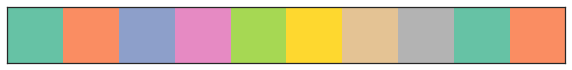

In [7]:
current_palette = seaborn.color_palette("Set2", 10)
seaborn.palplot(current_palette)

## Data analysis

Library structure and data analysis workflow is shown [here](https://github.com/tatyana-perlova/py-taxis#data-analysis-workflow). 

### Local constants

In [8]:
pixsize = 0.26 #size of the image pixel in microns
mnsize = 5 #minimal size of bacteria in pixels
mxsize = 250 #maximal size of bacteria in pixels
imdim = 2048 #size of the image in pixels
fps = 12.0 #video framerate
max_search_range = 45/(fps*pixsize) #maximum displacement of the bacteria 
#between consequent frames in pixels
min_search_range = 10
min_len = 20 #length cut-off for trajectories in frames

### Detecting bacteria

__Detection is done in the [image](https://github.com/tatyana-perlova/py-taxis/blob/master/pytaxis/image.py) module of the pytaxis library.__

I detect bacteria in each frame of a movie using the [openCV](https://opencv.org/) computer vision library. Background frame is obtained by weighted accumulation of movie frames. Each movie frame is background-subtracted and converted to binary format, at which point bacteria can be detected as connected white pixels on the black background. 

In [9]:
movie = '/home/perlusha/Work/2017/2017.10.07-Insight_demo/data/Rhodobacter_movie.avi'

First let's find background frame and make sure that default settings make sense. 

Number of frames used for accumulation is defined by _Nframes_. Weight of each individual frame is determined by _alpha_.

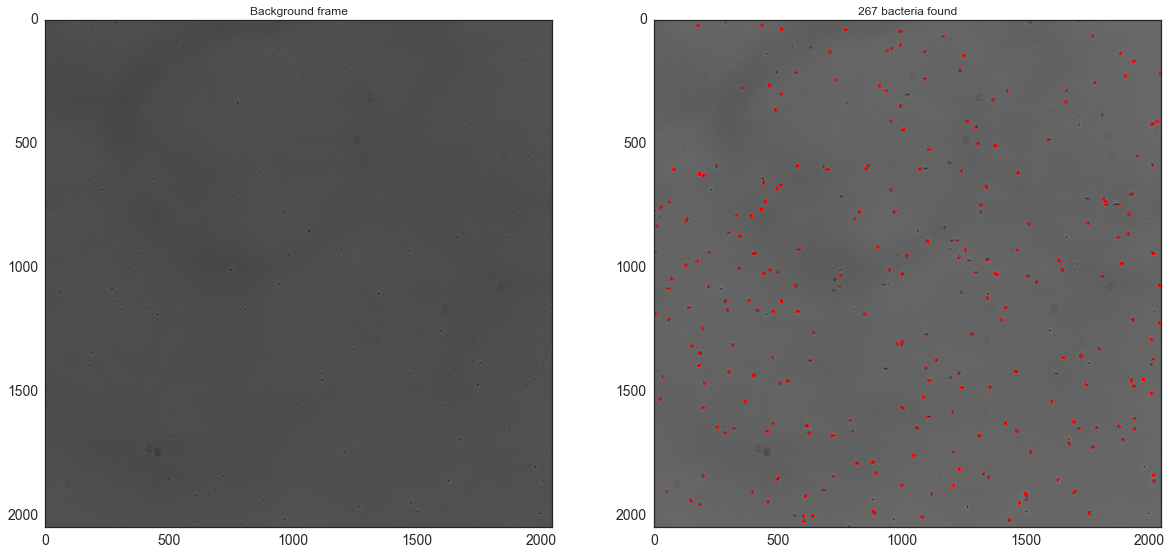

In [10]:
background, frame = pytaxis.image.test_detection(movie, 
                                                 mnsize = mnsize, 
                                                 mxsize = mxsize,
                                                 Nframes = 300,
                                                 alpha = 0.005, 
                                                 show = True)

Now we are going to detect bacteria in every frame of the movie. This function also plots number of bacteria vs frame number for testing purposes.

267  bacteria found in  0 th frame
269  bacteria found in  100 th frame


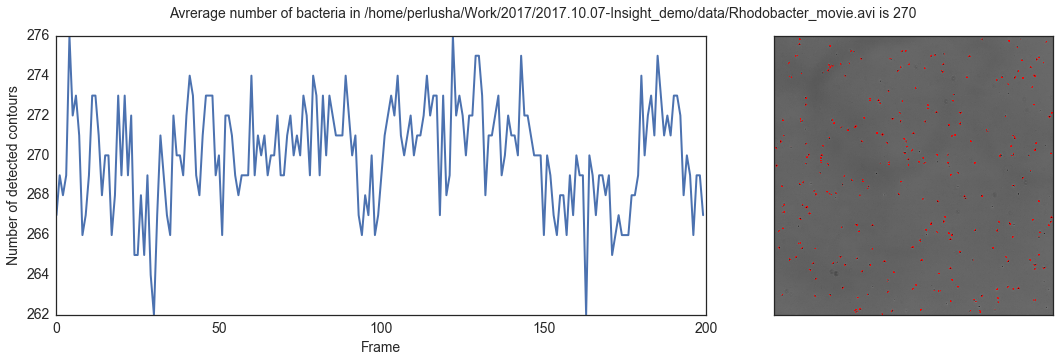

In [11]:
coords, img = pytaxis.image.find_cells_video(movie, 
                                             background, 
                                             maxframe = 200,  
                                             mnsize = mnsize, 
                                             mxsize = mxsize, 
                                             write = False)

_Coords_ is a dataframe with coordinates, lengths and angles of every feature found in every frame of the movie. That is the input format for the next stages of analysis - linking, calculating parameters etc, although only _'frame'_, _'x'_ and _'y'_ columns are necessary.

In [12]:
coords.head()

,body_angle,frame,length,x,y
0,19.971291,0,6.756704,604.465393,2024.828613
1,18.663326,0,5.961851,1432.896973,2020.982910
2,119.499008,0,6.753959,1081.000000,2007.500000
3,18.708805,0,6.958191,640.406372,2004.792847
4,45.453957,0,5.871851,602.825317,2003.669189


### Linking coordinates into trajectories

__Coordinates are linked into trajectories using linking function from [trackPy](https://github.com/soft-matter/trackpy) library.__

The basic idea is that for each particle or bacteria in $i$th frame the algorithm looks for its counterpart in $i+1$th frame. For $N$ particles, this means evaluating $N!$ sets of pairs of bacteria and choosing the best configuration, the one in which the largest number of bacteria have a suitable pair. This problem becomes computationally expensive for a large number of particles. To limit the number of candidates, [trackPy](https://github.com/soft-matter/trackpy) restricts its search to a region of a defined radius supplied by the user: the search range, centered on the particle position. I set the search range, which ideally should be larger than the maximum distance that bacteria can travel between frames, to $45/(fps ∗ pixel size)$ pixels, which corresponds to the tail of velocity distribution. I also allow for the possibility that bacteria might be missed for 1 frame, perhaps due to noise in the video, and
then seen again.

I use the adaptive search option. If in a particular frame there are too many candidates within the search range (the default limit is 30) I allow reducing search range in small steps until there are few enough candidates and the linking becomes possible. This alsmost never happens at the densities that I use, but this option avoids halting the calculation.

In [13]:
traj = tp.link_df(coords, 
                  search_range = max_search_range, 
                  adaptive_stop = min_search_range, 
                  adaptive_step=0.98, 
                  memory = 1)

Frame 199: 267 trajectories present


In addition to headers from 'coords' dataframe output of linking contains particle #.

In [14]:
traj.head()

,body_angle,frame,length,x,y,particle
0,19.971291,0,6.756704,604.465393,2024.828613,0.0
1,173.431534,1,7.045388,604.526001,2024.853149,0.0
2,4.195455,2,6.386922,604.930542,2024.815063,0.0
3,165.336212,3,6.675077,605.393433,2024.548218,0.0
4,158.849594,4,7.038126,603.595581,2024.144653,0.0


Let's plot resulting trajectories. Plotting functions are in the [plot](https://github.com/tatyana-perlova/py-taxis/blob/master/pytaxis/plot.py) module of the [pytaxis](https://github.com/tatyana-perlova/py-taxis) library.

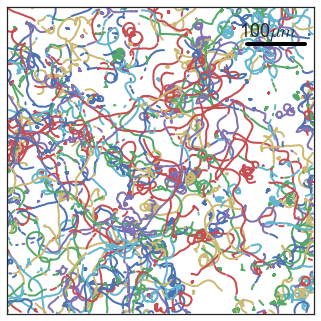

In [15]:
pytaxis.plot.plot_traj_all(traj, imdim, pixsize)

### Calculate parameters of the trajectories

__Parameters calculation is done using [proc](https://github.com/tatyana-perlova/py-taxis/blob/master/pytaxis/proc.py) module of the pytaxis library.__

I calculate instantaneous velocity $\vec{v}$, acceleration $\vec{a}$, angle between velocity vectors $\theta$, angular velocity $\omega$, angular acceleration $\alpha$ as follows:

$\vec{v}_i = d\vec{r}_i/dt$

$\vec{a}_i = d\vec{v}_i/dt$

$\theta_i = arctan(v_{yi}/v_{xi})$

$\omega_i = d\theta_i/dt$

$\alpha_i = d\omega_i/dt$

In [16]:
pytaxis.proc.calc_params(traj, wind = 1, fps = fps, pix_size = pixsize)

Now in addition to coordinates we now have velocities and accelerations.

In [17]:
traj.head()

,body_angle,frame,length,x,y,particle,index,vel,acc,angle,vel_angle,acc_angle
0,19.971291,0,6.756704,604.465393,2024.828613,0.0,0,0.204005,12.764936,0.384667,5.742431,-7.122503
1,173.431534,1,7.045388,604.526001,2024.853149,0.0,1,1.267749,4.791127,-0.093869,5.148889,283.502142
2,4.195455,2,6.386922,604.930542,2024.815063,0.0,2,1.667010,48.982418,-0.522943,28.774067,-217.735698
3,165.336212,3,6.675077,605.393433,2024.548218,0.0,3,5.748878,-14.242593,-2.920782,10.629426,22.861090
4,158.849594,4,7.038126,603.595581,2024.144653,0.0,4,4.561995,12.532937,2.476617,12.534516,212.227211


For further analysis short trajectories should be removed so before doing that let's look at the distribution of trajectory lengths.

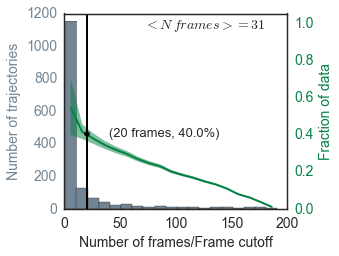

In [18]:
def f(cutoff):
    pytaxis.plot.traj_len_dist(traj, bw = 10, cutoffs = [cutoff])
    plt.axvline(cutoff, color = 'black')
interactive_plot = interactive(f, cutoff=(10, 50))
output = interactive_plot.children[-1]
interactive_plot

Remove trajectories shorter than min_len. Needs to be set to at least 20 for tumble bias assignment.

In [19]:
traj = tp.filter_stubs(traj, threshold=20)

### Filtering

As you can see on this [video](https://github.com/tatyana-perlova/py-taxis#example-of-the-detected-trajectories) along with normally swimming bacteria we get bacteria stuck to the glass surface. Trajectories that
belong to stuck or drifting bacteria decrease signal-to-noise ratio, as their run-tumble statistics are not
meaningful. I have developed the following procedure to filter such spurious trajectories.

For every trajectory, I calculate the average angular velocity and the 95th percentile of the velocity. The resulting two-dimensional distribution of trajectories in these coordinates contains two clusters: one corresponds to normally swimming bacteria, while the other contains trajectories of very slow or stuck bacteria. For each bacterial strain I have used, I find the coordinates of the maximum of the ’swimming’ cluster - the most probable
values of angular velocity and the 95th percentile of velocity, - and keep only the trajectories that lie within
a radius $R$ from the maximum of the distribution.

In [20]:
traj = pd.read_csv('/home/perlusha/Work/2017/2017.10.07-Insight_demo/data/Rhodobacter_traj_params.csv')
traj = tp.filter_stubs(traj, threshold=20)

For each trajectory I calculate statistics according to _'aggregations'_. 

In [24]:
aggregations = {'vel': lambda x: np.nanpercentile(x, 95),
                'vel_angle': np.nanmean,
               'frame': 'count'}
params4filtering = ['vel', 'vel_angle']

In [25]:
traj_stats = traj.groupby([u'particle'], as_index = False).agg(aggregations)

Essentially for each trajectories we calculate a set of numbers that are later used for filtering.

In [26]:
traj_stats.head()

,particle,vel,vel_angle,frame
0,0.0,5.649148,19.399706,176
1,1.0,6.971844,17.209590,445
2,2.0,6.012268,19.022773,1227
3,3.0,5.549500,18.222711,963
4,4.0,6.240000,18.446670,589


Find KDE, MADs and center of the main cluster in the new parameter space of trajectories.

In [27]:
(x0, y0), (MADx, MADy), (Z, extent) = pytaxis.proc.find_MADs_KDE(traj_stats[params4filtering[0]], 
                                                                 traj_stats[params4filtering[1]])
distances = pytaxis.proc.assign_dist(traj_stats, params = params4filtering, center = (x0, y0), R = (MADx, MADy))
layers = np.arange(max(distances), stop = 0, step = -1)
layers.sort()

In [28]:
traj_stats.head()

,particle,vel,vel_angle,frame,distance
0,0.0,5.649148,19.399706,176,5.0
1,1.0,6.971844,17.209590,445,5.0
2,2.0,6.012268,19.022773,1227,5.0
3,3.0,5.549500,18.222711,963,5.0
4,4.0,6.240000,18.446670,589,5.0


Plot resulsing KDE along with ellipses corresponding to certain distance from the center and example trajectories in each layer.

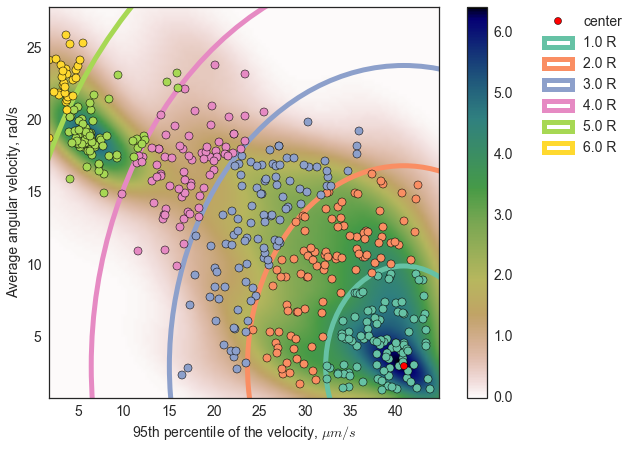

In [29]:
pytaxis.plot.plot_KDE(Z, extent, N_traj = len(traj_stats), tick_step = 1)
pytaxis.plot.plot_ellipses(plt.gca(), (MADx, MADy), (x0, y0), layers, colors = current_palette)
i = 0
traj2plot = []
for layer in np.sort(layers):

    particles = traj_stats[((traj_stats.distance <= layer)&
                            (traj_stats.distance > layer - 1)&
                            (traj_stats.frame > 50))].particle   
    particles = random.sample(particles, min(100, len(particles)))
    plt.plot(traj_stats[traj_stats.particle.isin(particles)].vel, 
             traj_stats[traj_stats.particle.isin(particles)].vel_angle, 
             'o', 
             color = current_palette[i],
             label = '')
    traj2plot.append({'layer': layer, 'particles': particles})
    i += 1
plt.plot(x0, y0, 'o', color = 'Red', markersize = 7, label = 'center')
plt.xlabel(r'95th percentile of the velocity, $\mu m/s$')
plt.ylabel(r'Average angular velocity, rad/s')
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.8))
plt.gca().set_aspect(1.0*np.diff(plt.gca().get_xlim())[0]/np.diff(plt.gca().get_ylim())[0])

Now plot trajectories from each layer.

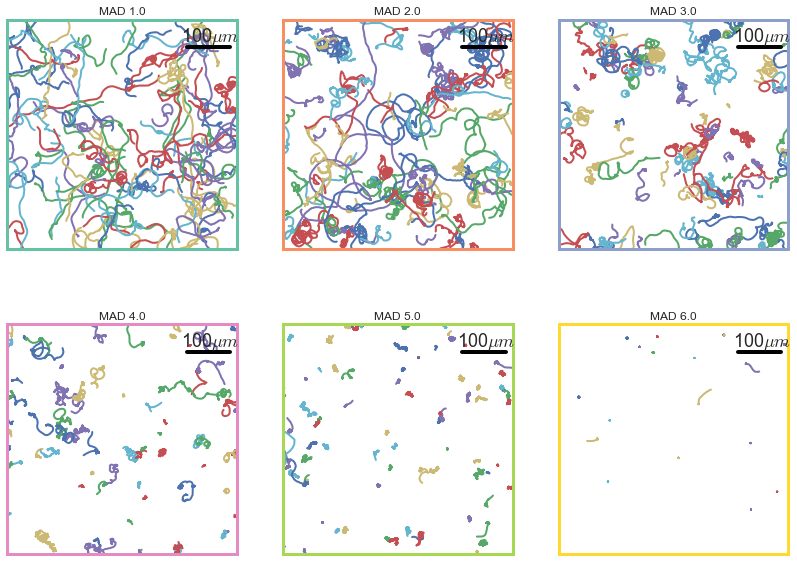

In [30]:
i = 0
plt.figure(figsize=(14, 10))

for i in range(len(traj2plot)):
    particles = traj2plot[i]['particles']
    plt.subplot(2,3,i+1)
    pytaxis.plot.plot_traj_all(traj[traj.particle.isin(particles)].reset_index(drop = True), 
                               imdim, pixsize)
    plt.title('MAD {0}'.format(traj2plot[i]['layer']))
    plt.gca().set_aspect(1.0)
    for spine in plt.gca().spines.values():
        spine.set_edgecolor(current_palette[i])
        spine.set_linewidth(3)

Remove trajectories further than certain distance away from the center.

In [31]:
particles_filt = traj_stats[traj_stats.distance <= 4].particle.unique()
traj_filtered = traj[traj.particle.isin(particles_filt)].copy(deep = True)

In [32]:
traj_filtered = traj_filtered[~np.isnan(traj_filtered.acc_angle)]
traj_filtered.sort_values(by = ['particle', 'frame'], inplace=True)

Alternatively we can use [MeanShift](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) to detect clusters in the trajectory distribution.

[MeanShift](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) clustering aims to discover “blobs” in a smooth density of samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.


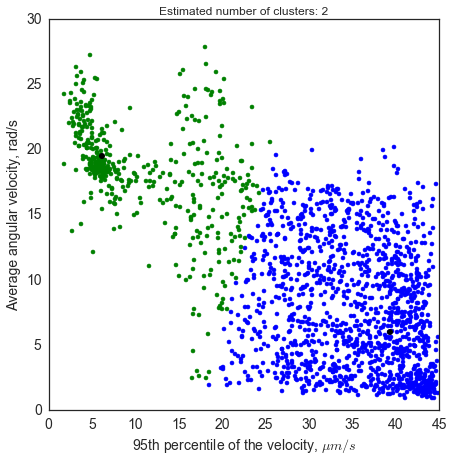

In [33]:
f, ax  = plt.subplots(1, figsize = (7, 7))
(MADx, MADy), (x0, y0), _, labels = pytaxis.proc.find_MADs_MeanShift(ax, 
                                                                     params4filtering[0], 
                                                                     params4filtering[1], 
                                                                     traj_stats, 
                                                                     min_bin_freq = 100)
plt.xlabel(r'95th percentile of the velocity, $\mu m/s$')
plt.ylabel(r'Average angular velocity, rad/s')
plt.gca().set_aspect(1.0*np.diff(plt.gca().get_xlim())[0]/np.diff(plt.gca().get_ylim())[0])

### Run-tumble assignment

#### Thresholding

__Assigning motility states can be done using simple thresholding of motility parameters.__

Thresholding criteria are based on the empirical observation that tumbles/stops corresponds to periods of slow swimming and fast reorientation and, therefore, high angular velocity. A tumble is detected when the swimming speed is below the threshold value and the angular velocity is above the threshold value. The threshold value for swimming velocity is different for each bacterial trajectory and is defined as 95th percentile of the velocity divided by 2. Threshold values for angular velocity were set to 5 rad/s.

In [34]:
traj_filtered = pytaxis.proc.calc_stat(traj_filtered, ['vel'], 
                                       [lambda x: np.nanpercentile(x, 95)/2], ['thresh'])
traj_filtered.loc[:, 'tbias_alon'] = 1
traj_filtered.loc[((traj_filtered.vel < traj_filtered.vel_thresh)&
                   (traj_filtered.vel_angle > 5)), 'tbias_alon'] = 0

Plot resulting distribution of parameters in run and tumble states.

In [35]:
run_tumble_palette = seaborn.xkcd_palette(['light red', 'cerulean'])

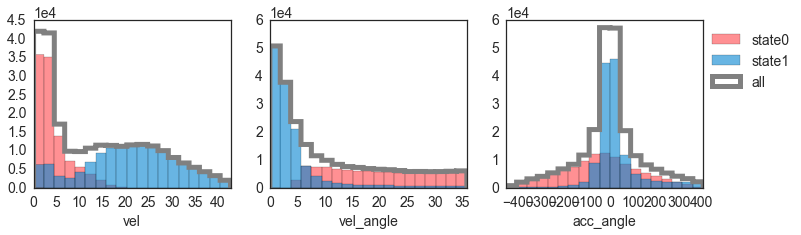

In [36]:
pytaxis.plot.dist_by_state(traj_filtered, 'tbias_alon', ('vel', 'vel_angle', 'acc_angle'), 
                           palette = run_tumble_palette)

Let's test run-tumble assignment by looking more closely at one of the longer trajectories.

In [37]:
traj_lenghts = traj_filtered.groupby('particle', as_index=False)[['frame']].count()
tracks_long = traj_lenghts[traj_lenghts.frame > 300].particle.values

Plot trajectory.

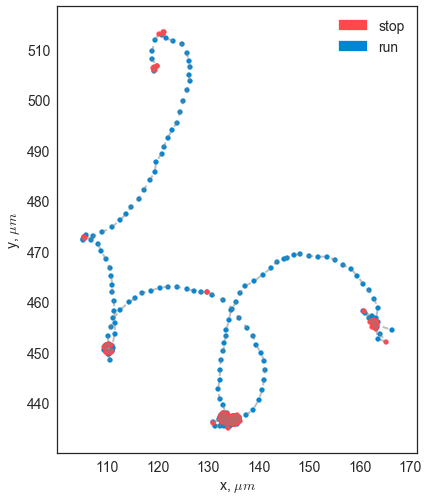

In [38]:
pytaxis.plot.plot_traj(traj_filtered, 
                       [tracks_long[1]], 
                       pixsize, size = 8, 
                       colorbystate=True, 
                       state = 'tbias_alon', 
                       palette = run_tumble_palette)
red_patch = mpatches.Patch(color=run_tumble_palette[0], label='stop')
blue_patch = mpatches.Patch(color=run_tumble_palette[1], label='run')
plt.legend(handles=[red_patch, blue_patch])

Plot corresponding time traces of motility parameters.

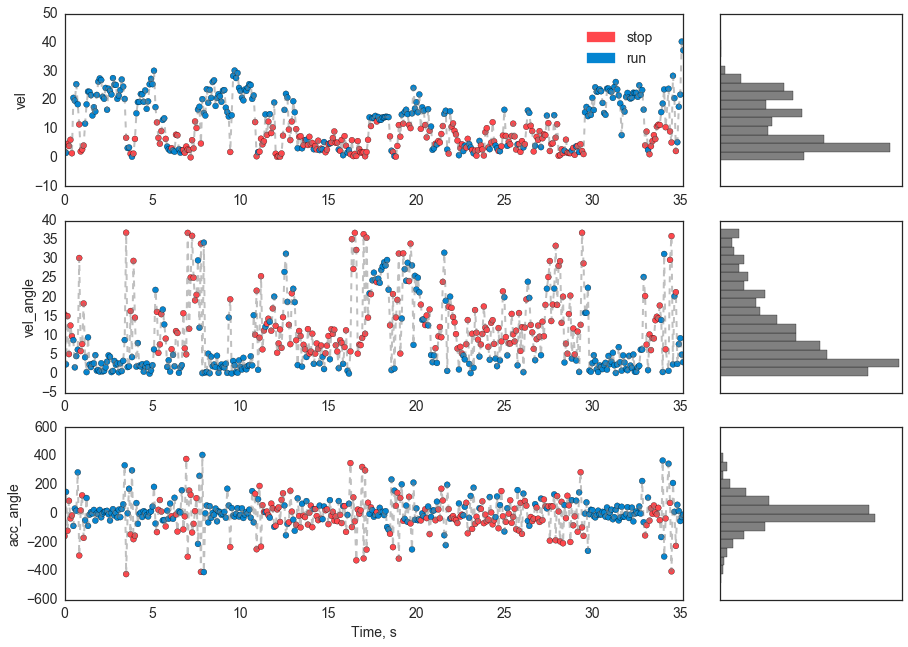

In [39]:
pytaxis.plot.plot_params(traj_filtered, tracks_long[1], 
                         pixsize, fps, 
                         size = 15, 
                         params = ['vel', 'vel_angle', 'acc_angle'],
                         colorbystate = True, state = 'tbias_alon', 
                         palette = run_tumble_palette)
red_patch = mpatches.Patch(color=run_tumble_palette[0], label='stop')
blue_patch = mpatches.Patch(color=run_tumble_palette[1], label='run')
plt.legend(handles=[red_patch, blue_patch], loc='center right', bbox_to_anchor=(-0.3, 3.2))

#### Hidden Markov Model

__Motility state assignment is done in [proc](https://github.com/tatyana-perlova/py-taxis/blob/master/py-taxis/proc.py) module of [pytaxis](https://github.com/tatyana-perlova/py-taxis) library and uses [Hidden Markov Model](https://en.wikipedia.org/wiki/Hidden_Markov_model) (HMM) implemented in [hmmlearn](http://hmmlearn.readthedocs.io/en/latest/) package.__

I use HMM with Gaussian emissions to infer the sequence of the hidden states from the sequence of the observable parameters - velocity, acceleration and angular acceleration, etc. Parameters of the model - the transition probability matrix and the emission probabilities of the observables - are estimated from a
reference dataset. Training is done iteratively. At each iteration velocities and accelerations are normalized by average swimming velocity (the 95th percentile of the velocity is used on the first iteration), model parameters are estimated from the resulting sequence of observables, and optimal sequence of the states is inferred. The process is repeated until the change in normalized velocity between two consecutive iterations is below the treshold, which usually takes 3-5 iterations.

Load model for run-tumble detection. You can use trained model or train it on the current dataset as well.|

In [40]:
HMM_model = joblib.load('/home/perlusha/Work/2017/2017.02.22-HMM/060317/HMM_model_12:00.pkl')

Assign runs and tumbles.

iteration  0
iteration  1


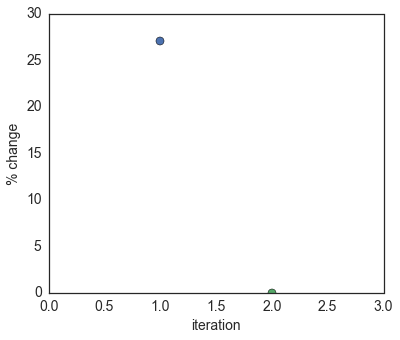

In [41]:
_, traj_filtered = pytaxis.proc.find_tumbles(traj_filtered,
                                            model = HMM_model,
                                            params = ['vel'], 
                                            n_components = 2, 
                                            threshold = 1,
                                            covariance_type = 'diag',
                                            model_type = 'HMM')

Plot resulting distribution of parameters in run and tumble states.

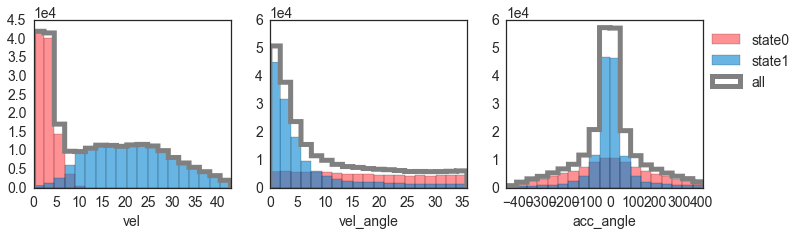

In [42]:
pytaxis.plot.dist_by_state(traj_filtered, 'tbias_HMM', ('vel', 'vel_angle', 'acc_angle'), 
                           palette = seaborn.xkcd_palette(['light red', 'cerulean']))


Let's test run-tumble assignment by looking at individual bacterial trajectories.

Plot trajectory.

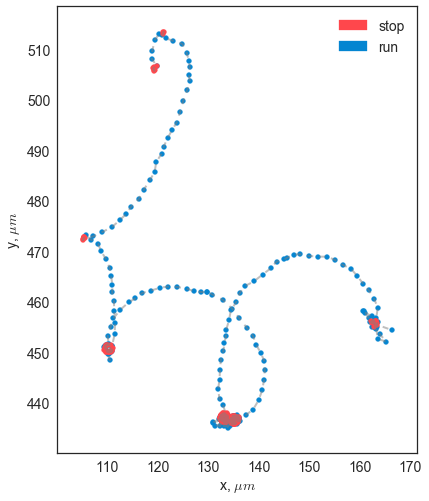

In [43]:
pl = pytaxis.plot.plot_traj(traj_filtered, 
                       [tracks_long[1]], 
                       pixsize, size = 8, 
                       colorbystate=True, 
                       state = 'tbias_HMM', 
                       palette = run_tumble_palette)
red_patch = mpatches.Patch(color=run_tumble_palette[0], label='stop')
blue_patch = mpatches.Patch(color=run_tumble_palette[1], label='run')
plt.legend(handles=[red_patch, blue_patch])

Plot corresponding time traces.

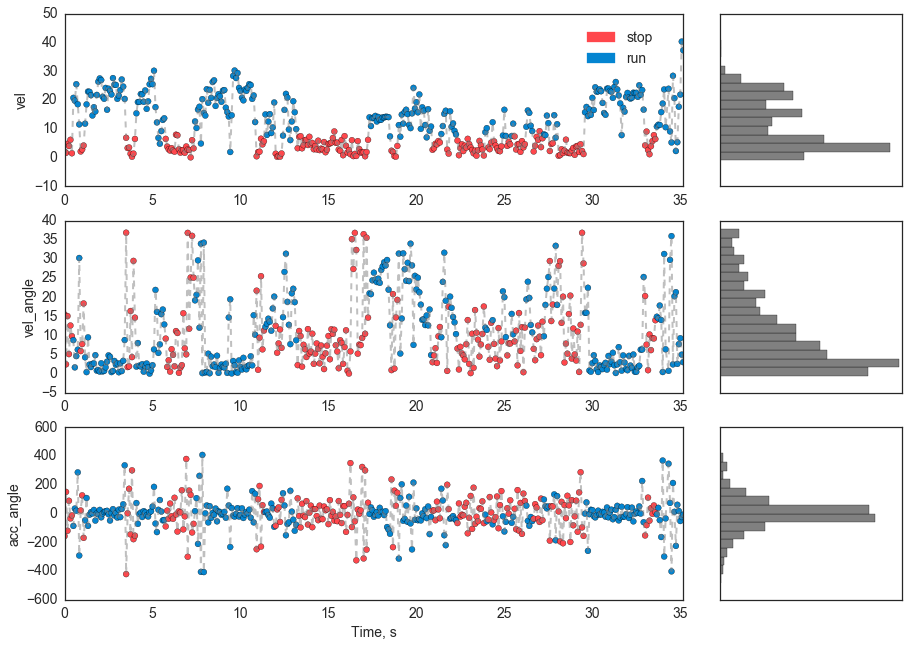

In [44]:
pytaxis.plot.plot_params(traj_filtered, tracks_long[1], 
                         pixsize, fps, 
                         size = 15, 
                         params = ['vel', 'vel_angle', 'acc_angle'],
                         colorbystate = True, state = 'tbias_HMM', 
                         palette = run_tumble_palette)
red_patch = mpatches.Patch(color=run_tumble_palette[0], label='stop')
blue_patch = mpatches.Patch(color=run_tumble_palette[1], label='run')
plt.legend(handles=[red_patch, blue_patch], loc='center right', bbox_to_anchor=(-0.3, 3.2))

## Results

### Response to light

Calculate time traces.

In [45]:
trace =  traj_filtered.groupby(['frame'], 
                            as_index = False)[['vel_angle', 'vel_run', 
                                               'tbias_HMM', 'vel']].agg(['mean', 'std', 'count'])
trace.reset_index(inplace = True)

Find times when light was turned on/off

In [46]:
light = traj_filtered[['light', 'frame']].groupby([u'frame'], as_index = False).agg(np.nanmean)
light.loc[:, 'light_change'] = light.light - light.light.shift(1)

frame_light_on = light[light.light_change > 0.001].frame.values[0]
frame_light_off = light[light.light_change < -0.001].frame.values[0]


Plot time traces

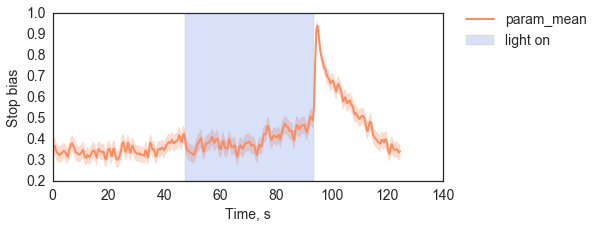

In [47]:
f, ax = plt.subplots(1, 1, figsize = (7, 3), sharex=True)

_ = pytaxis.plot.plot_trace(ax, wind = 10, shift = 5, 
                            data = trace[['frame', 'tbias_HMM']], fps = fps, 
           color = current_palette[1], tbias = True)
plt.xlabel('Time, s')
plt.ylabel('Stop bias')

ax.fill_between([frame_light_on/fps, frame_light_off/fps], 
                [ax.get_ylim()[0], ax.get_ylim()[0]], 
                [ax.get_ylim()[1], ax.get_ylim()[1]],
                facecolor='RoyalBlue', 
                alpha=0.20,
               label = 'light on')
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.9))


As you can see there is little if any response to turning light on, however there is very strong response to turning light off.

### Distribution of run and tumble times

First let's find run-tumble intervals.

In [48]:
traj_filtered['block'] = (traj_filtered.tbias_HMM.shift(1) != traj_filtered.tbias_HMM).astype(int).cumsum()
intervals = traj_filtered.reset_index().groupby(['tbias_HMM','block', 'particle'])['index'].apply(np.array)
intervals = pd.DataFrame(intervals)
intervals.reset_index(inplace=True)

In [49]:
intervals.head()

,tbias_HMM,block,particle,index
0,0,2,7.0,"[3501, 3502, 3503, 3504, 3505, 3506, 3507, 350..."
1,0,4,7.0,"[3603, 3604, 3605, 3606, 3607, 3608, 3609]"
2,0,6,7.0,"[3620, 3621, 3622, 3623, 3624, 3625, 3626]"
3,0,8,7.0,"[3678, 3679, 3680]"
4,0,10,7.0,"[3682, 3683, 3684, 3685, 3686, 3687, 3688]"


Now we are ready to find actual run-tumble times.

In [50]:
tumbles = intervals[intervals.tbias_HMM == 0]['index'].apply(lambda x: len(x)).values/fps
runs = intervals[intervals.tbias_HMM == 1]['index'].apply(lambda x: len(x)).values/fps

Plot cumulative distribution of run and tumble times.

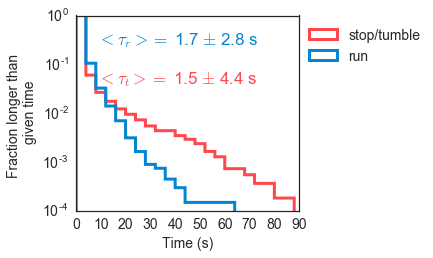

In [51]:
plt.figure(figsize=(4,3.5))
bins = np.arange(0, max(tumbles), 4)
plt.hist(tumbles, normed=1, bins = bins, cumulative=-1, 
         histtype='step',linewidth = 3, color = run_tumble_palette[0], label = 'stop/tumble')
plt.hist(runs, normed=1, bins = bins, cumulative=-1, 
         histtype='step',linewidth = 3, color = run_tumble_palette[1], label = 'run')

plt.yscale('log')
plt.ylabel('Fraction longer than \n given time')
plt.xlabel('Time (s)')
plt.legend(loc = 1, bbox_to_anchor=(1.6, 1.0))
plt.annotate(r'$<\tau_t> =$ {0} $\pm$ {1} s'.format(round(np.mean(tumbles), 1), round(np.std(tumbles), 1)), xy = (0.1, 0.65), 
             xycoords = 'axes fraction', fontsize = 17, color = run_tumble_palette[0])
plt.annotate(r'$<\tau_r> =$ {0} $\pm$ {1} s'.format(round(np.mean(runs), 1), round(np.std(runs), 1)), xy = (0.1, 0.85), 
             xycoords = 'axes fraction', fontsize = 17, color = run_tumble_palette[1])

I have found that distributions of run and tumble durations are exponential at short
intervals and deviate from exponential at longer intervals. Non-exponential run and tumble
distributions suggest that bacterial motility does not obey simple two-state model which is not
surprising given the complexiy of the underlying signalling patways.